In [5]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = ['Noto Sans Mono CJK TC'] #By default, matplotlib does NOT show Japanese characters
                                                                                                               #Solution: download Japanese fonts and put it in matplotlib's folder
                                                                                                                #https://albertauyeung.github.io/2020/03/15/matplotlib-cjk-fonts.html
    
import PIL
from PIL import Image
import sys
import pyocr
import pyocr.builders
import cv2

pic_path = "./data/Ministry.jpg"

im = PIL.Image.open(pic_path)
# im.show()

In [9]:
#Get OCR tool
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool available")
    sys.exit(1)
else:
    tool = tools[0] #If nothing else is installed, tesseract is the first and only OCR tool available
#     print(tool)
 
    
#Function that turns an image into strings
def img_to_str (pic_path, lang="jpn", builder_name="LineBoxBuilder"):
    builders = {"LineBoxBuilder": pyocr.builders.LineBoxBuilder()}
    detected = tool.image_to_string(PIL.Image.open(pic_path),
                                                               lang=lang,
                                                               builder=builders[builder_name])
    return detected
    
res_jpn_eng = img_to_str(pic_path, "jpn+eng")
res_eng = img_to_str(pic_path, "eng")
res_jpn = img_to_str(pic_path, "jpn")
res = res_jpn_eng
    
out = cv2.imread(pic_path)

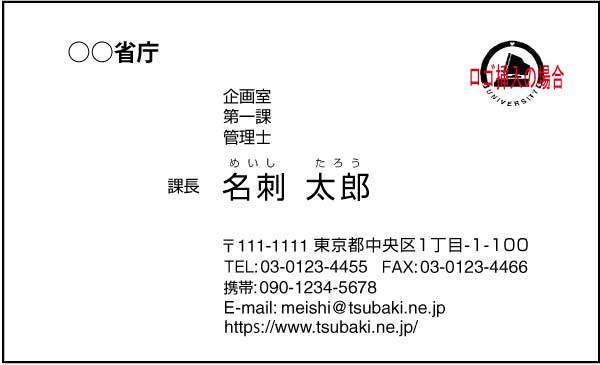

In [10]:
import IPython
IPython.display.Image(filename=pic_path) 

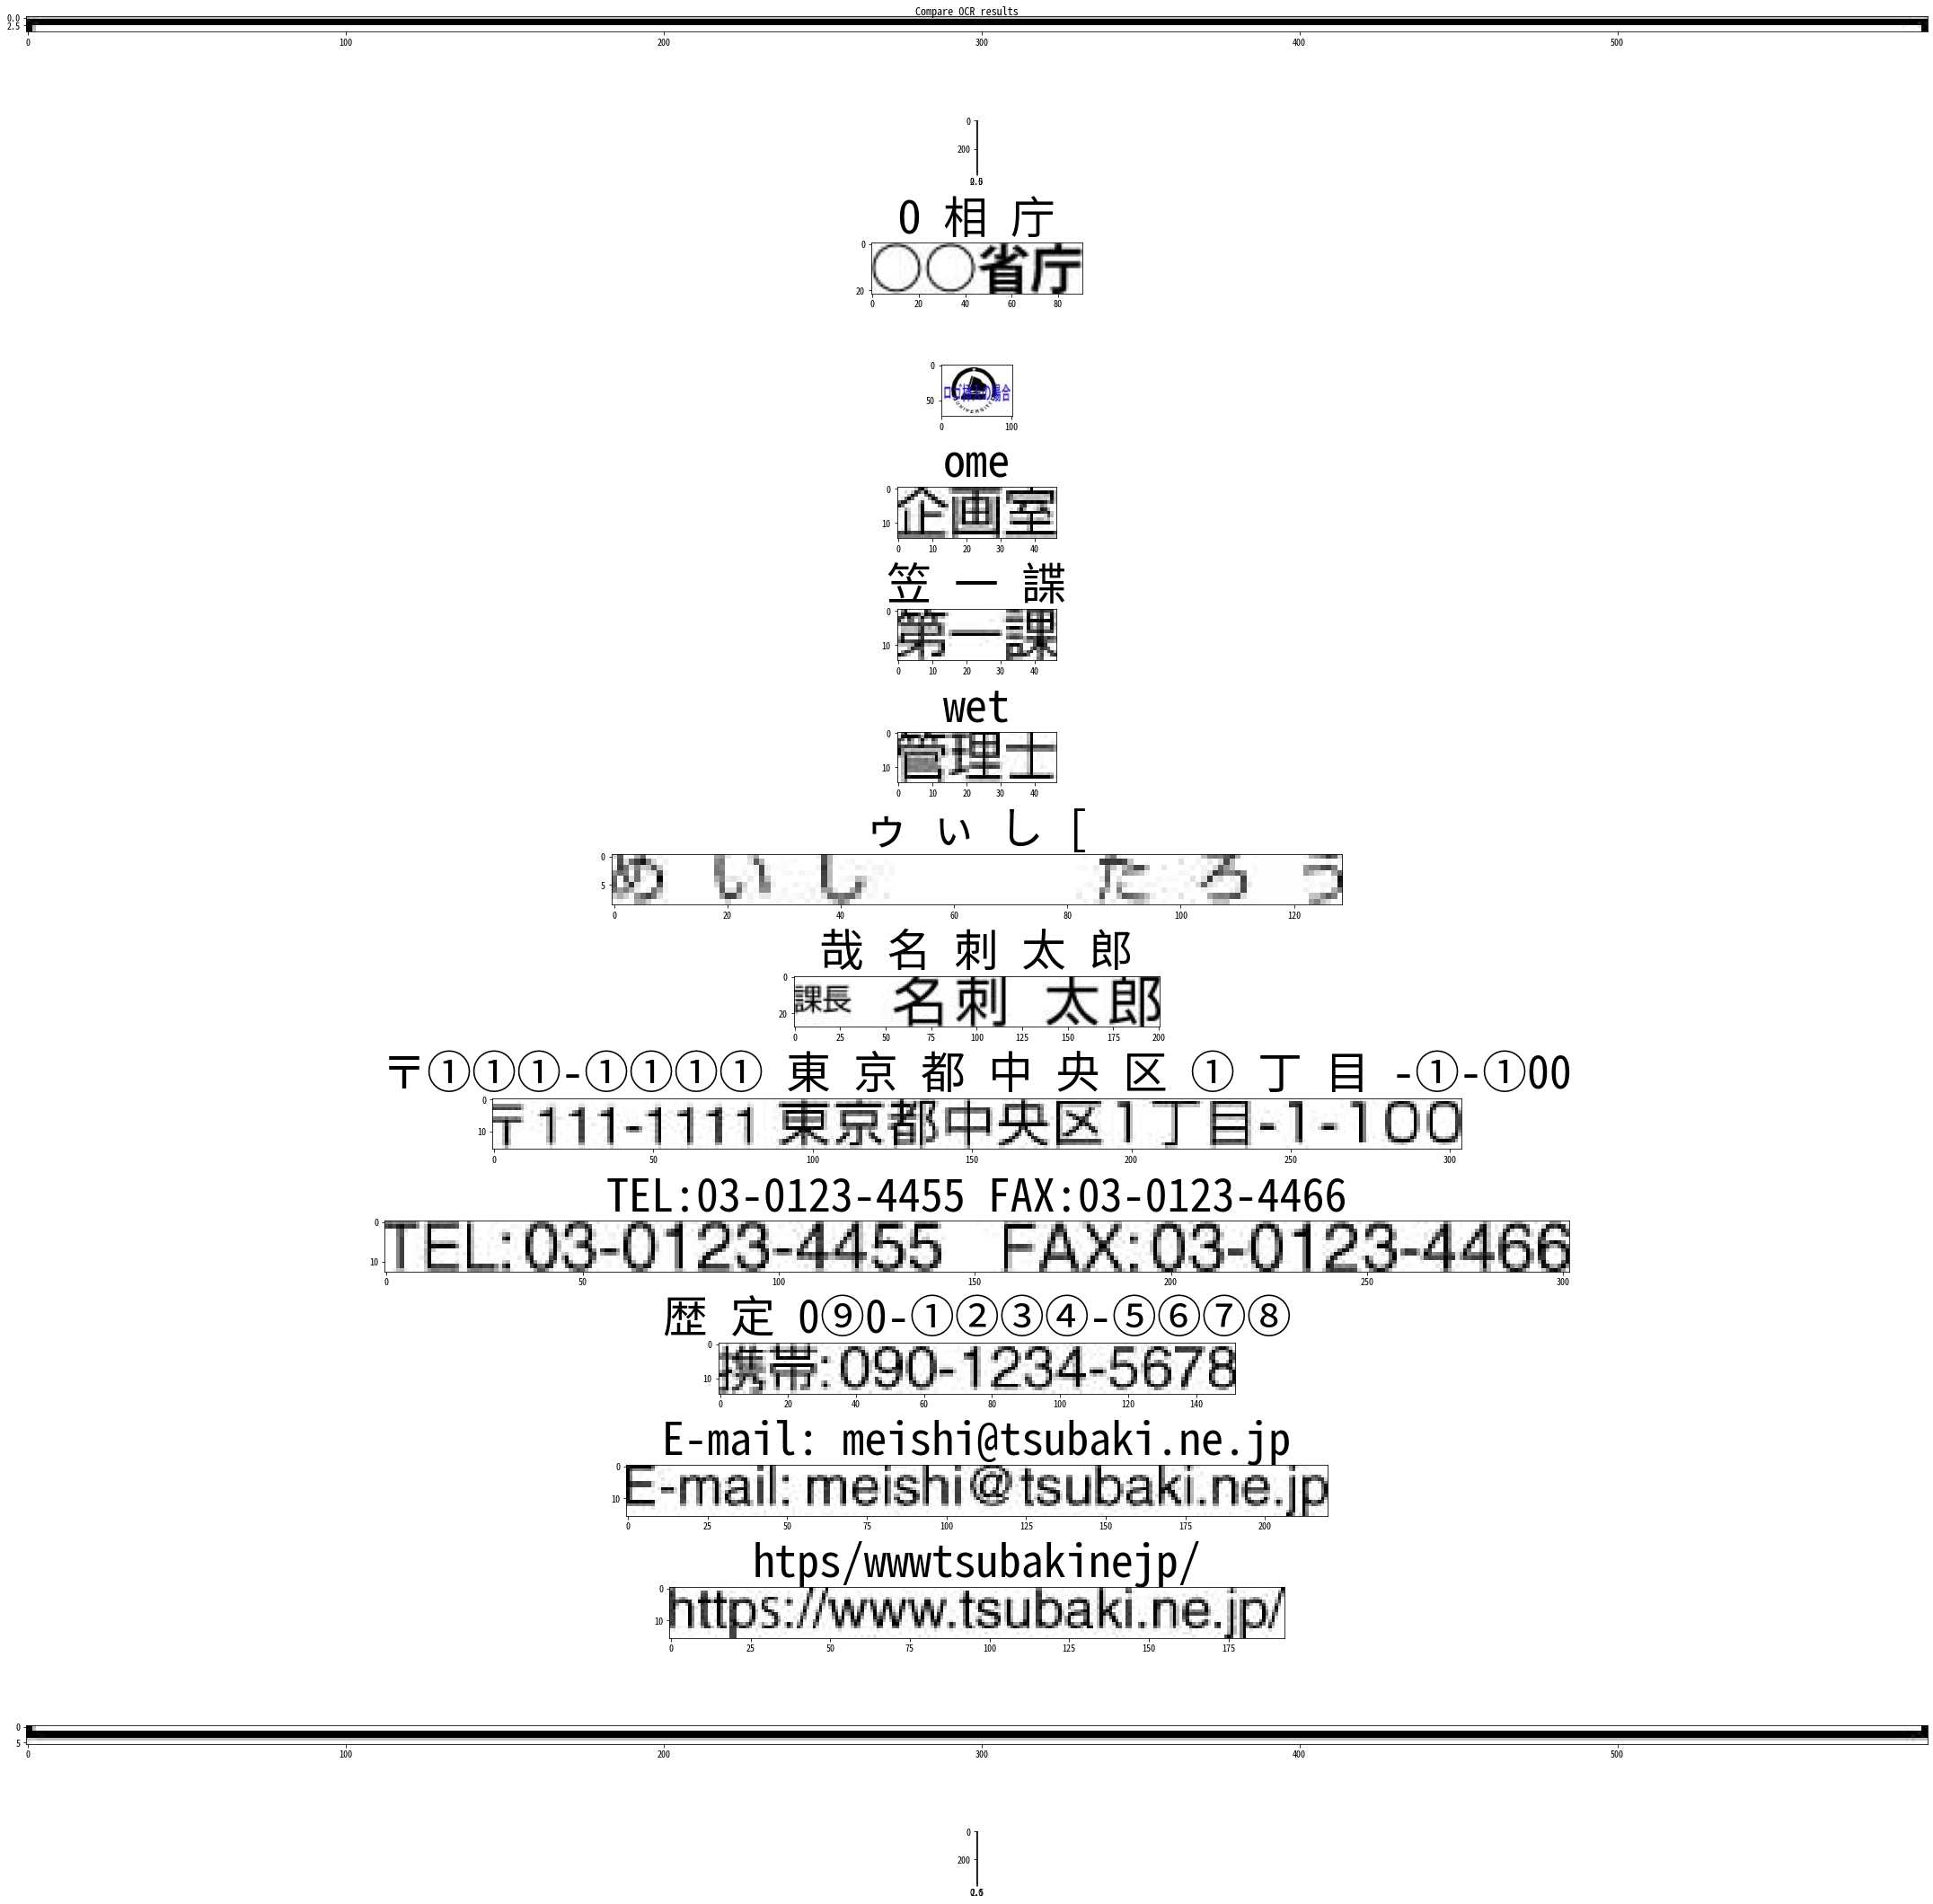

In [11]:
fig, ax = plt.subplots(len(res), figsize=(30,30))
fig.suptitle("Compare OCR results")
for index, d in enumerate(res):
    crop_img = out[d.position[0][1]:d.position[1][1], d.position[0][0]:d.position[1][0]]
    ax[index].imshow(crop_img)
    ax[index].set_title(d.content, fontsize=50)
    
plt.tight_layout()
# plt.show()
    